In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

diabetes = datasets.load_diabetes()
print(len(diabetes.target))

X = diabetes.data[:]
y = diabetes.target[:]


print(X.shape)

442
(442, 10)


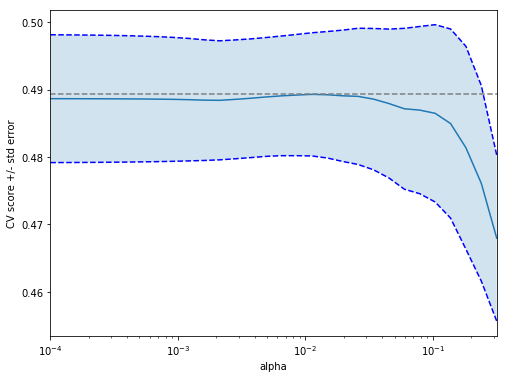

In [2]:


lasso = Lasso()
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

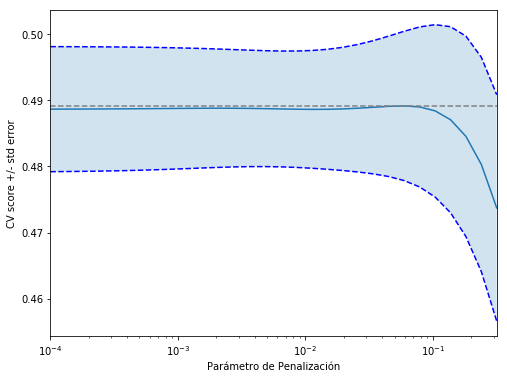

In [3]:
RidgeM = Ridge()
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3

clf = GridSearchCV(RidgeM, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores2 = clf.cv_results_['mean_test_score']
scores2_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores2)

# plot error lines showing +/- std. errors of the scores
std2_error = scores2_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores2 + std2_error, 'b--')
plt.semilogx(alphas, scores2 - std2_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores2 + std2_error, scores2 - std2_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('Parámetro de Penalización')
plt.axhline(np.max(scores2), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

In [4]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores2)
plt.semilogx(alphas, scores)
plt.xlabel('Parámetro de Regularización')
plt.show()

In [5]:
n_alphas = 200
alphas = np.logspace(-4, 4, n_alphas)
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('Parámetro de Penalización')
plt.ylabel('Pesos')
plt.title('Los coeficientes de Ridge en función de la regularización')
plt.axis('tight')
plt.show()

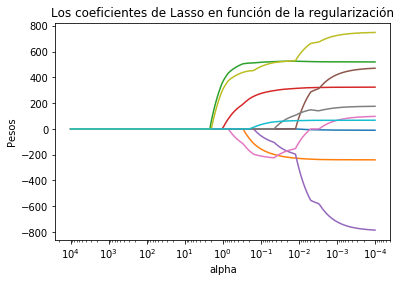

In [6]:
n_alphas = 200
alphas = np.logspace(-4, 4, n_alphas)
coefs = []
for a in alphas:
    lassomodel = Lasso(alpha=a, fit_intercept=False)
    lassomodel.fit(X, y)
    coefs.append(lassomodel.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('Pesos')
plt.title('Los coeficientes de Lasso en función de la regularización')
plt.axis('tight')
plt.show()